In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

folder_type = '3-SS-max'

BO_dir = os.path.join('../../../4-comparison/2-localoptima/4-BO/', folder_type)
GA50_dir = os.path.join('../../0-data/BO-GA/1-50/', folder_type)
GA100_dir = os.path.join('../../0-data/BO-GA/2-100/', folder_type)
GA_dir = os.path.join('../../../4-comparison/2-localoptima/1-GA/', folder_type)
MDTS_dir = os.path.join('../../../4-comparison/2-localoptima/5-MCTS/', folder_type)

P_list = [
    '0.01.log',
    '0.03.log',
    '0.05.log',
    '0.1.log',
]

title_list = [
    'Top 1% structures',
    'Top 3% structures',
    'Top 5% structures',
    'Top 10% structures',    
]

custom_palette = ["lightgray", "#00bfff", "#00bfff", "blue", "gray"]

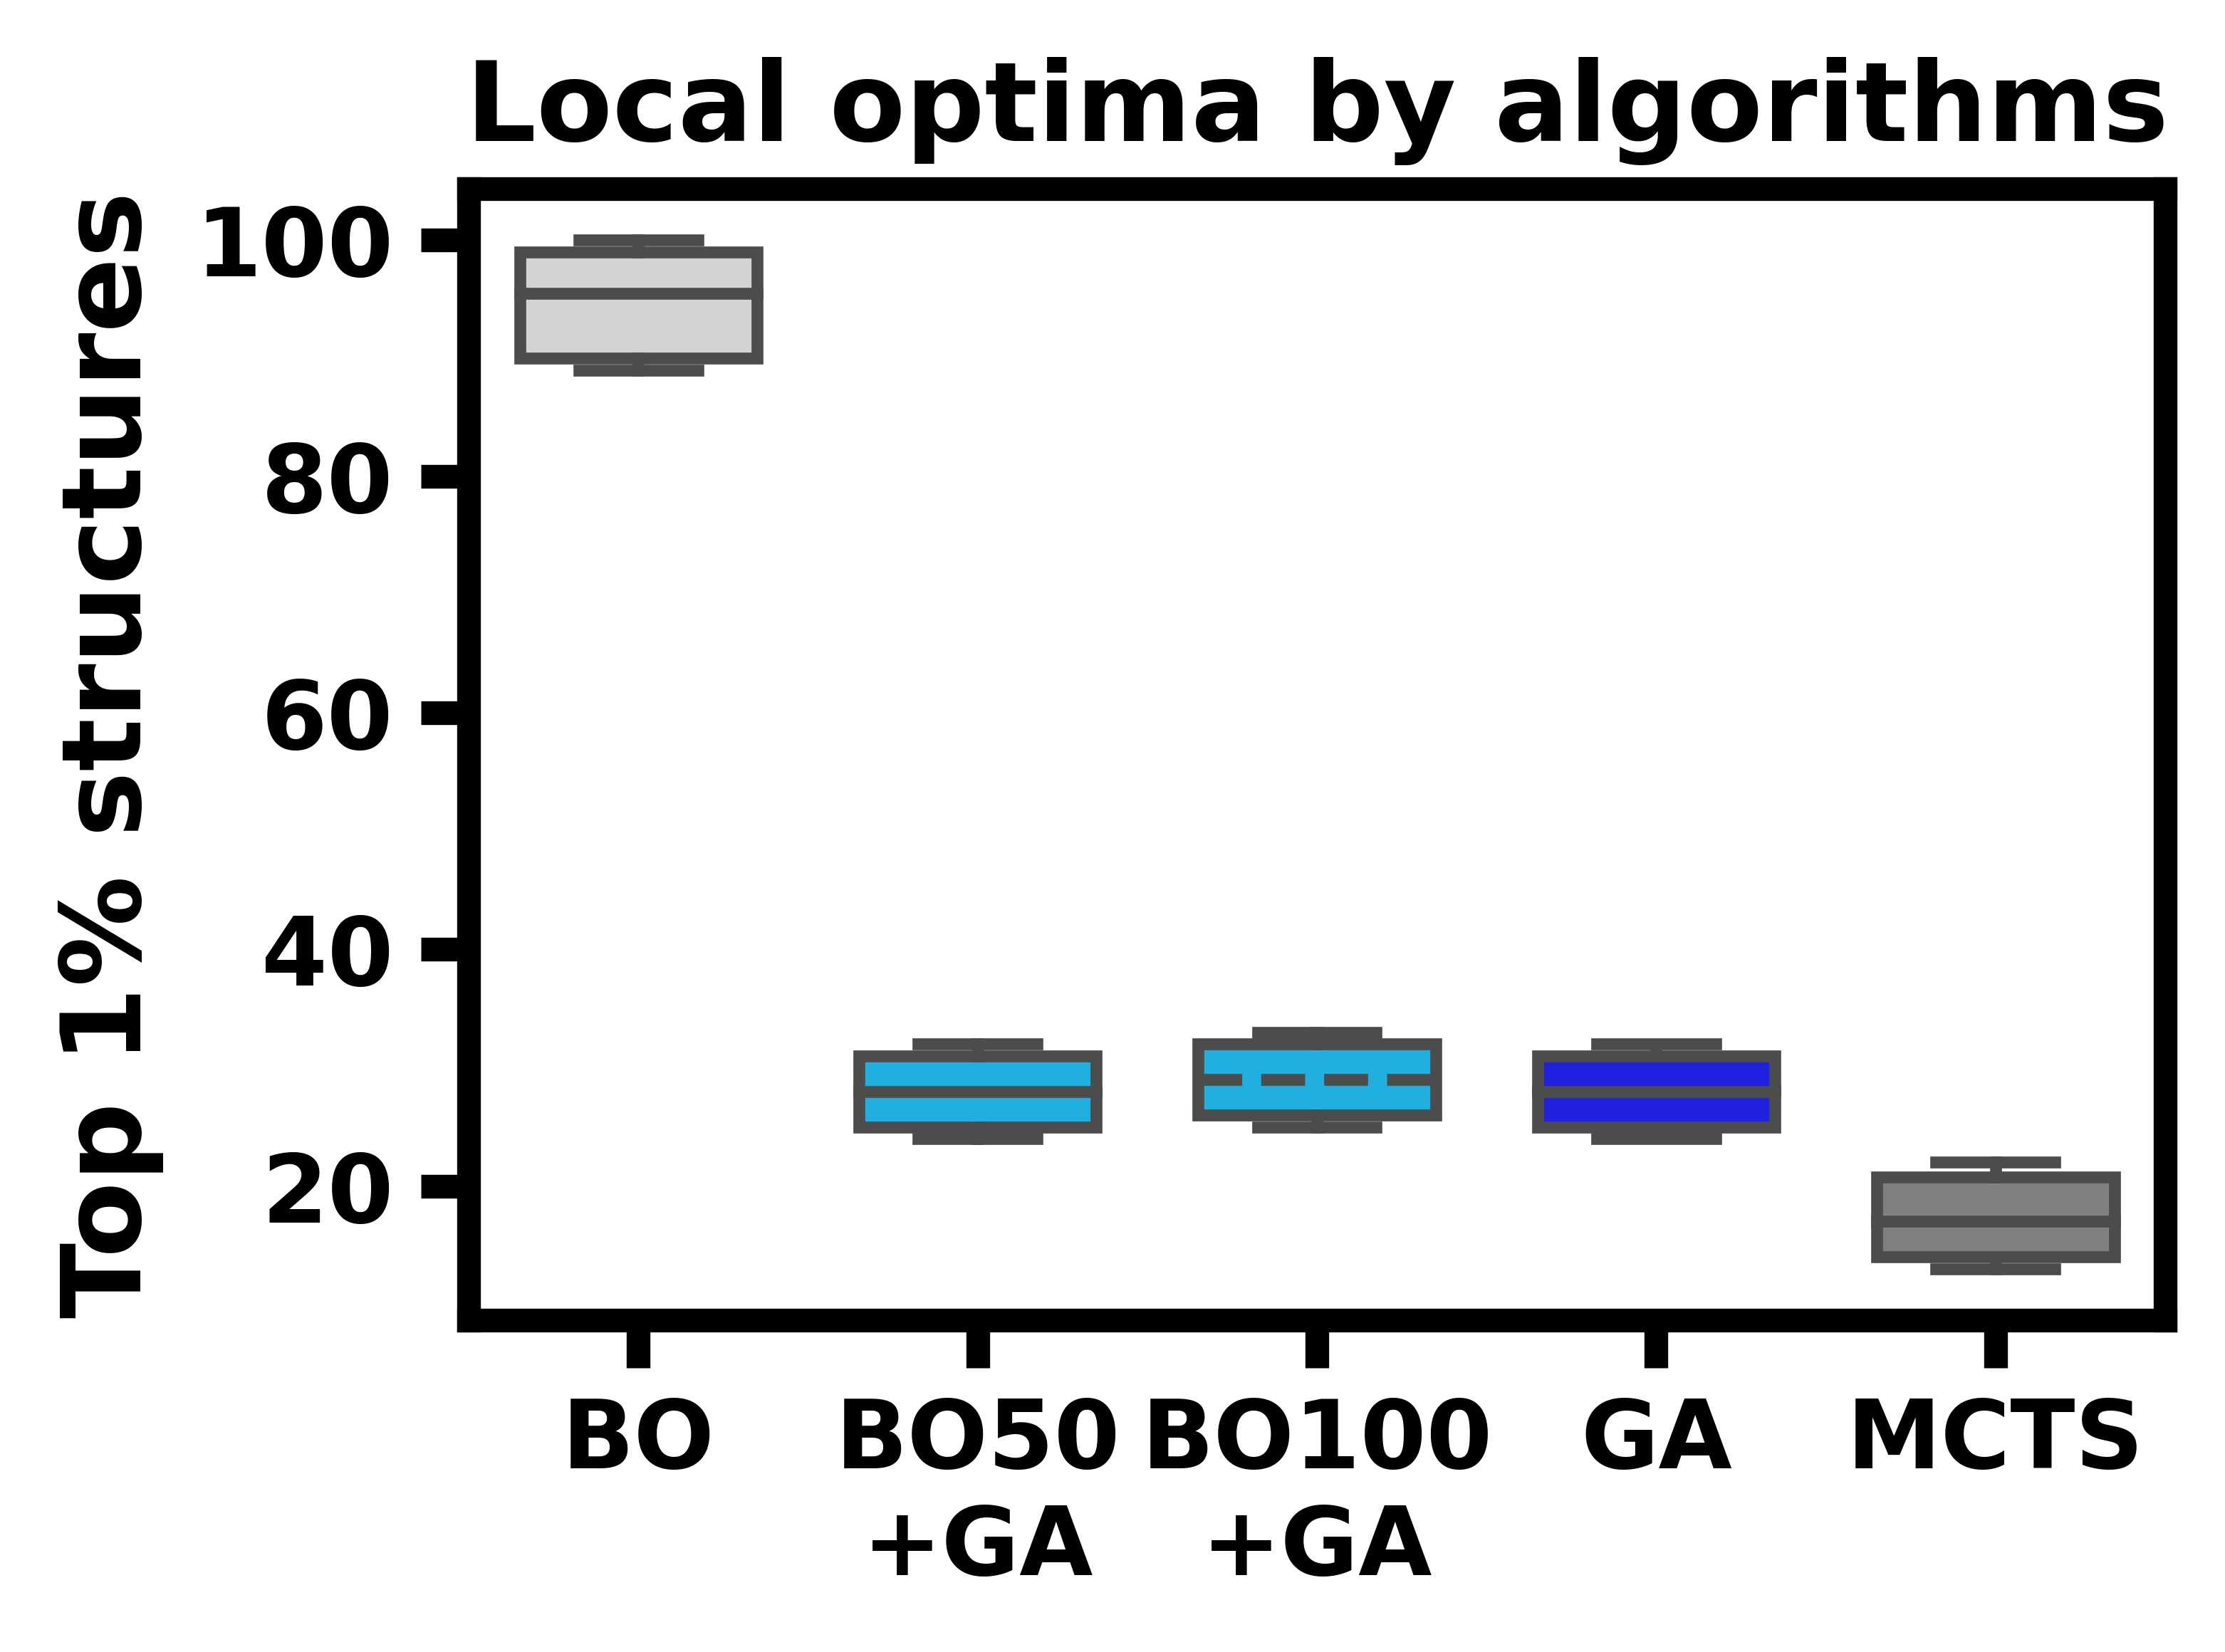

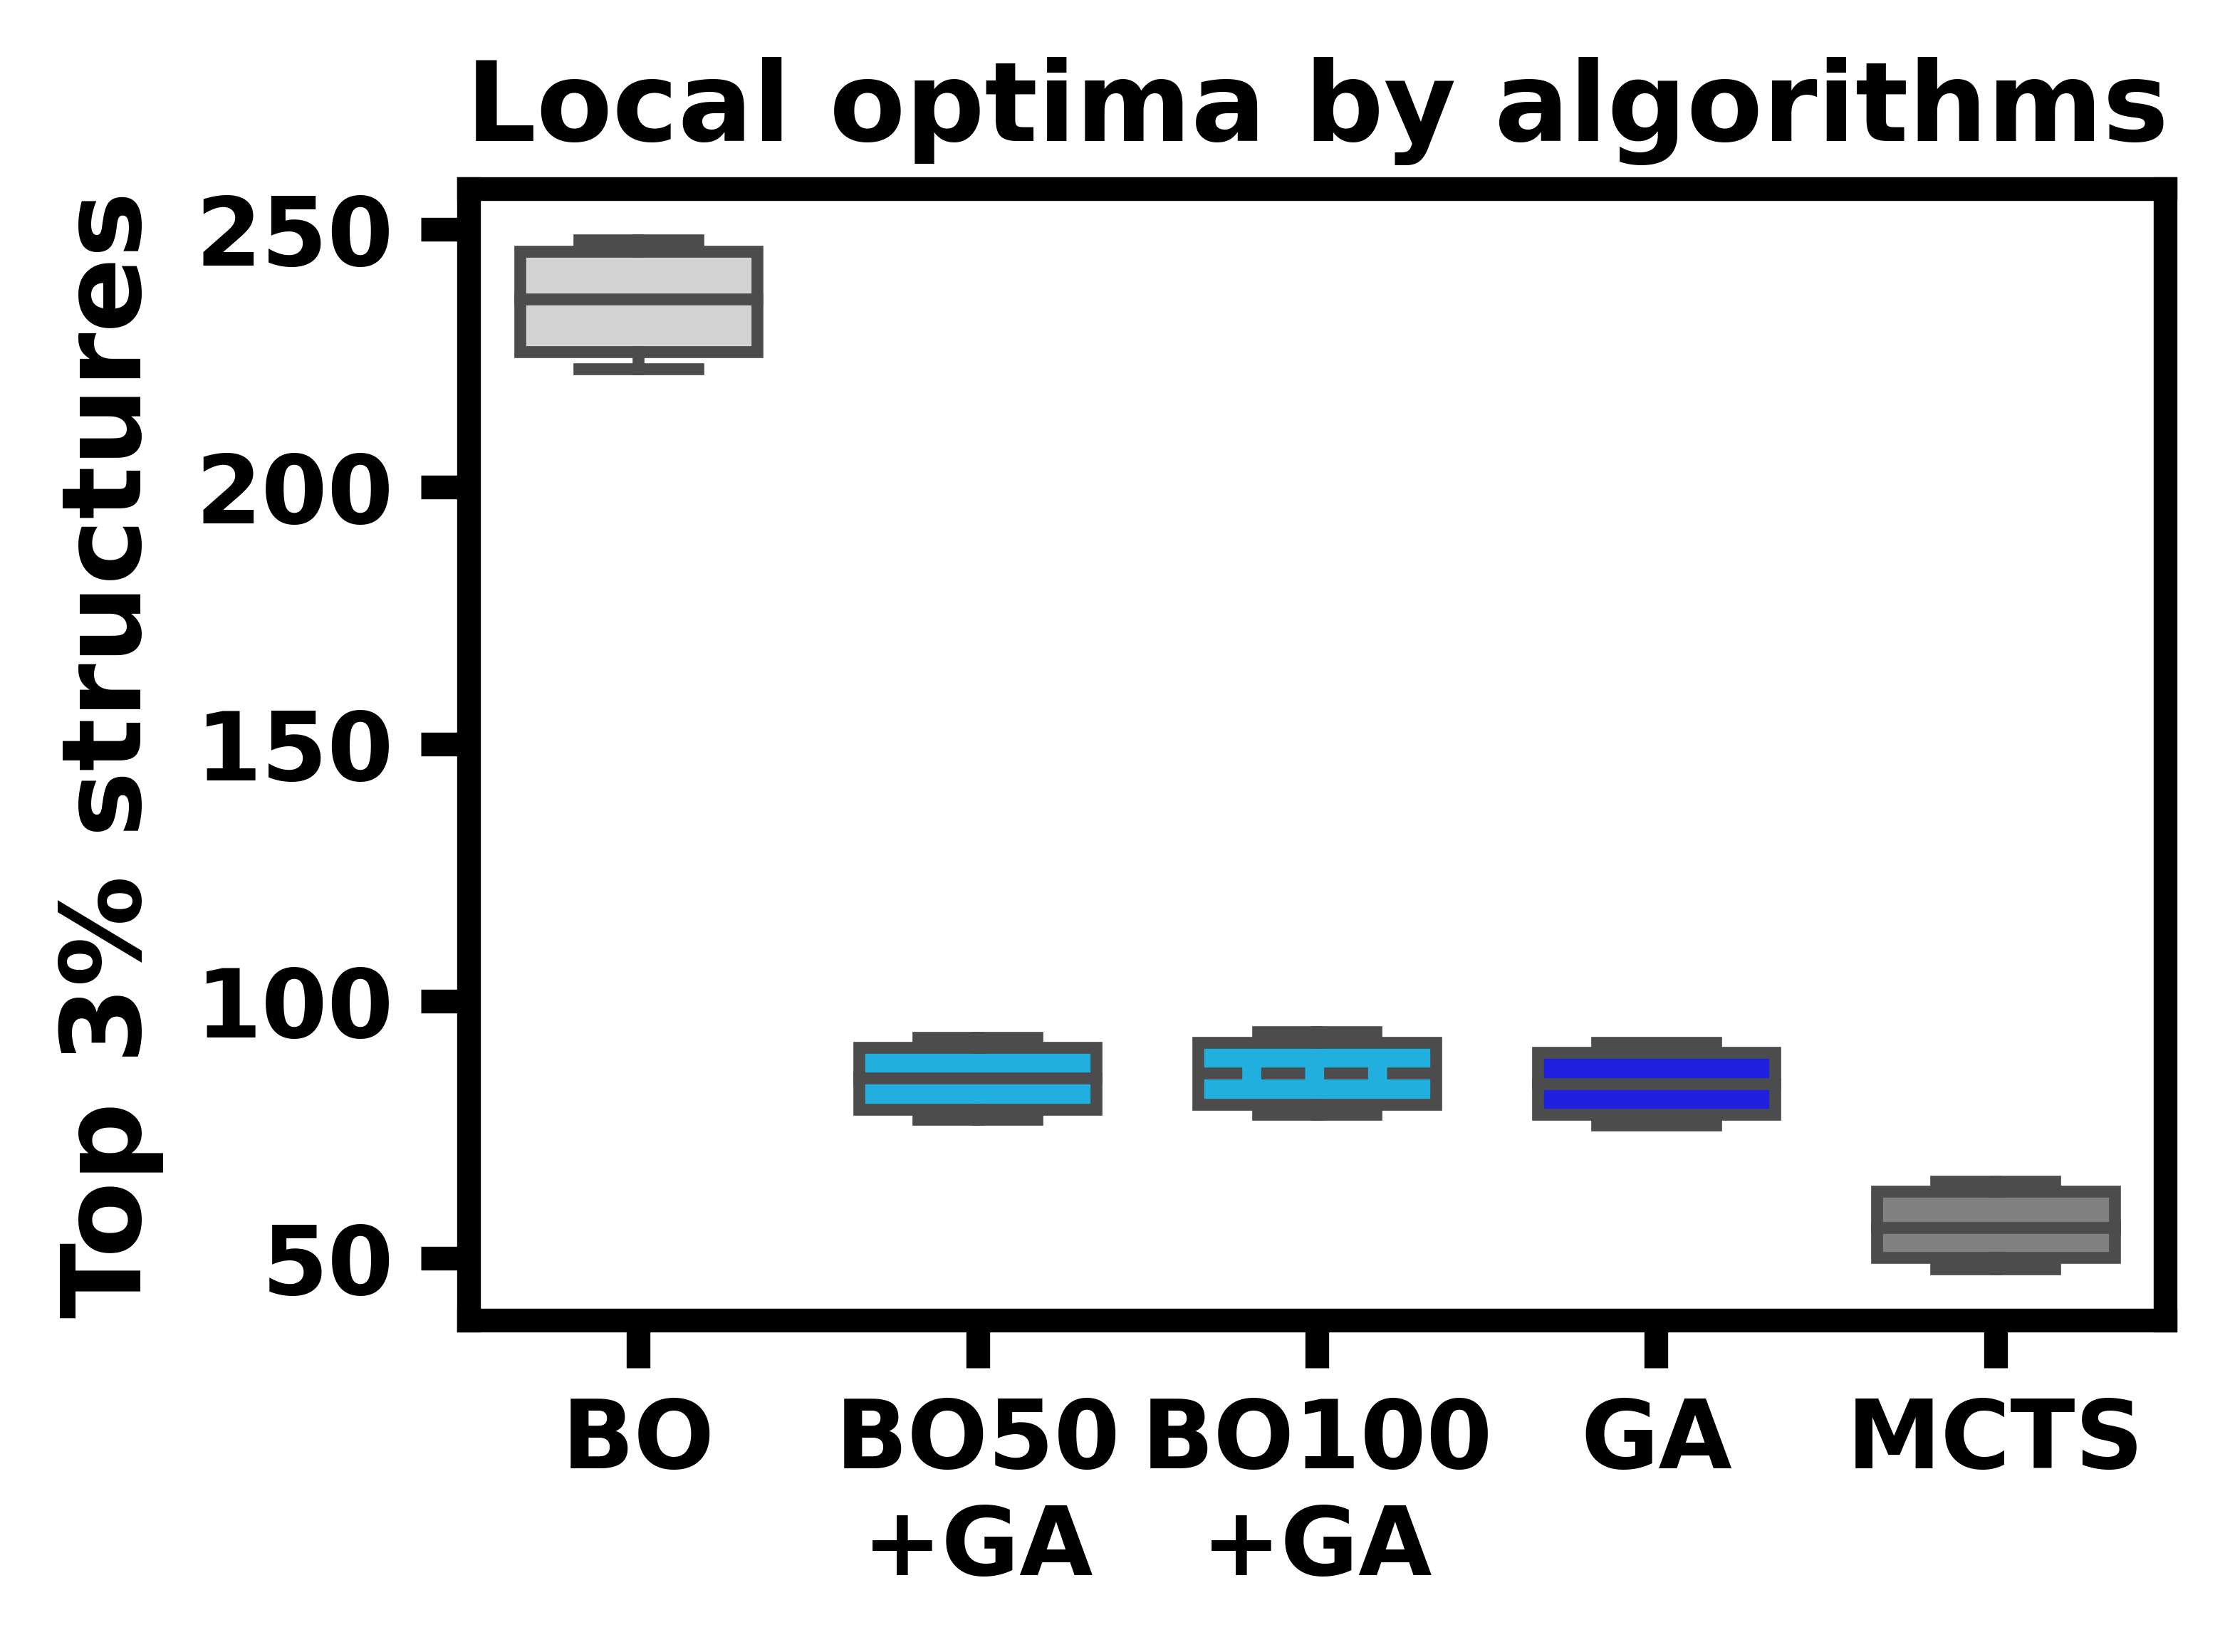

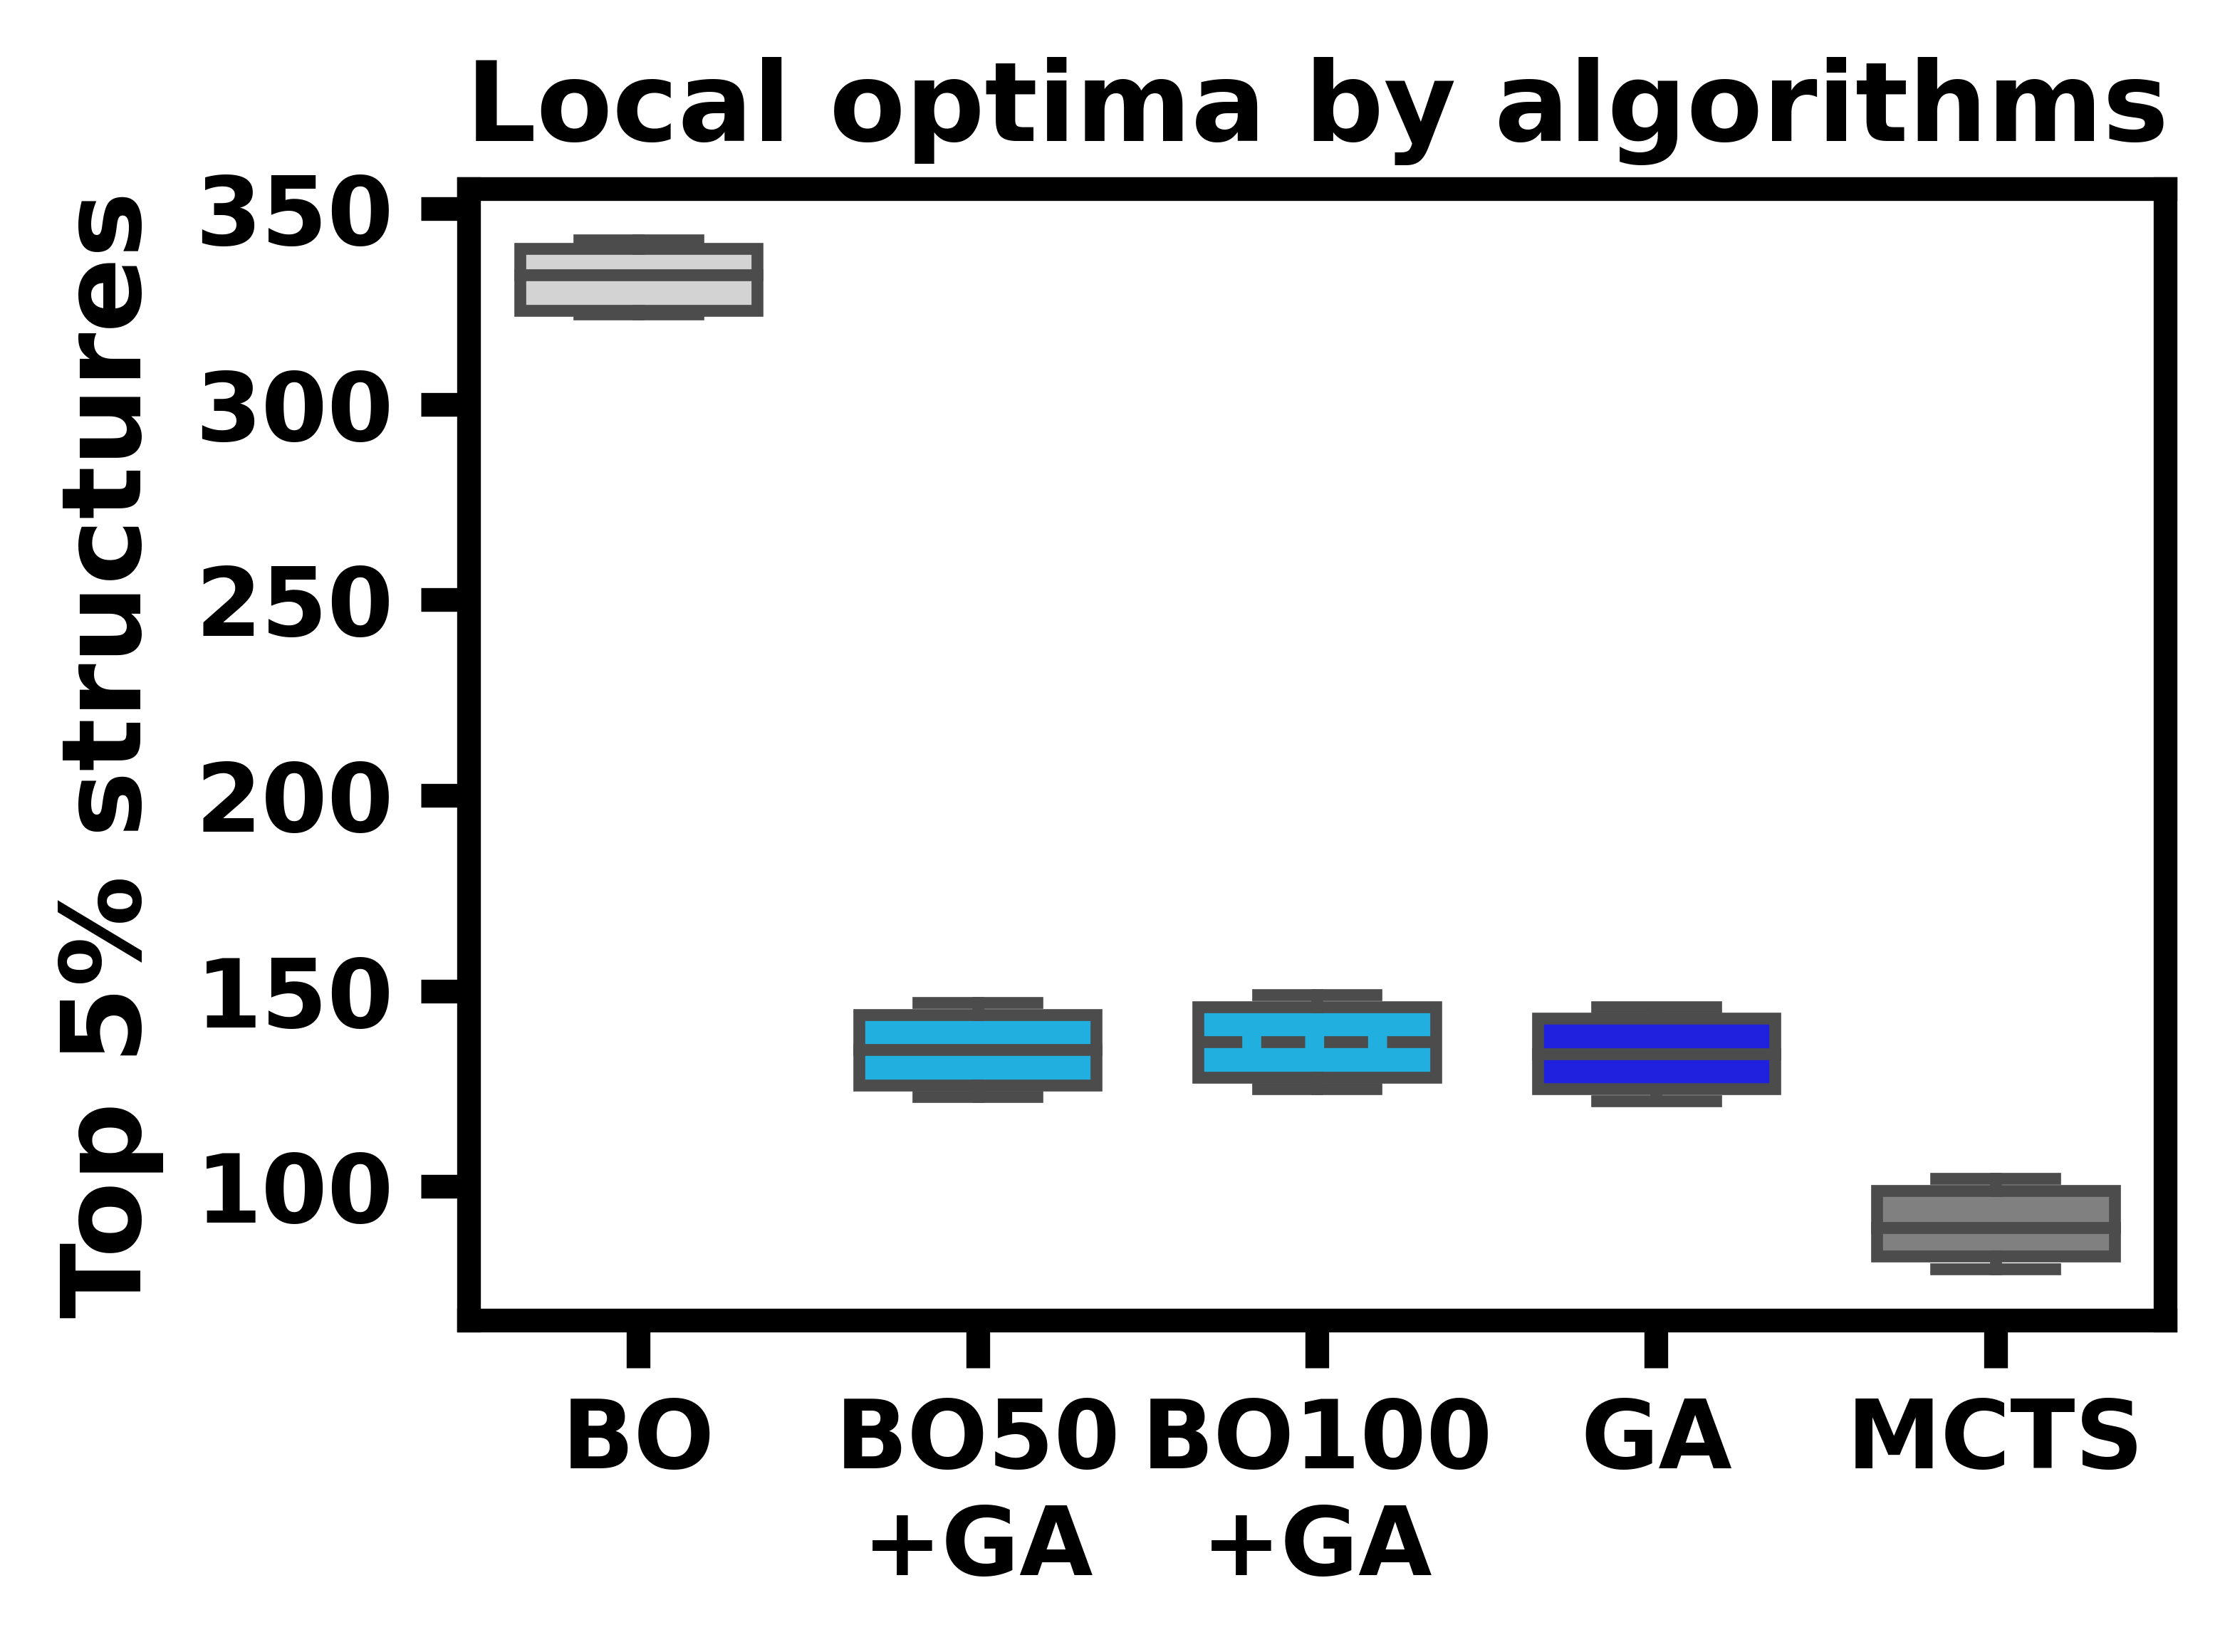

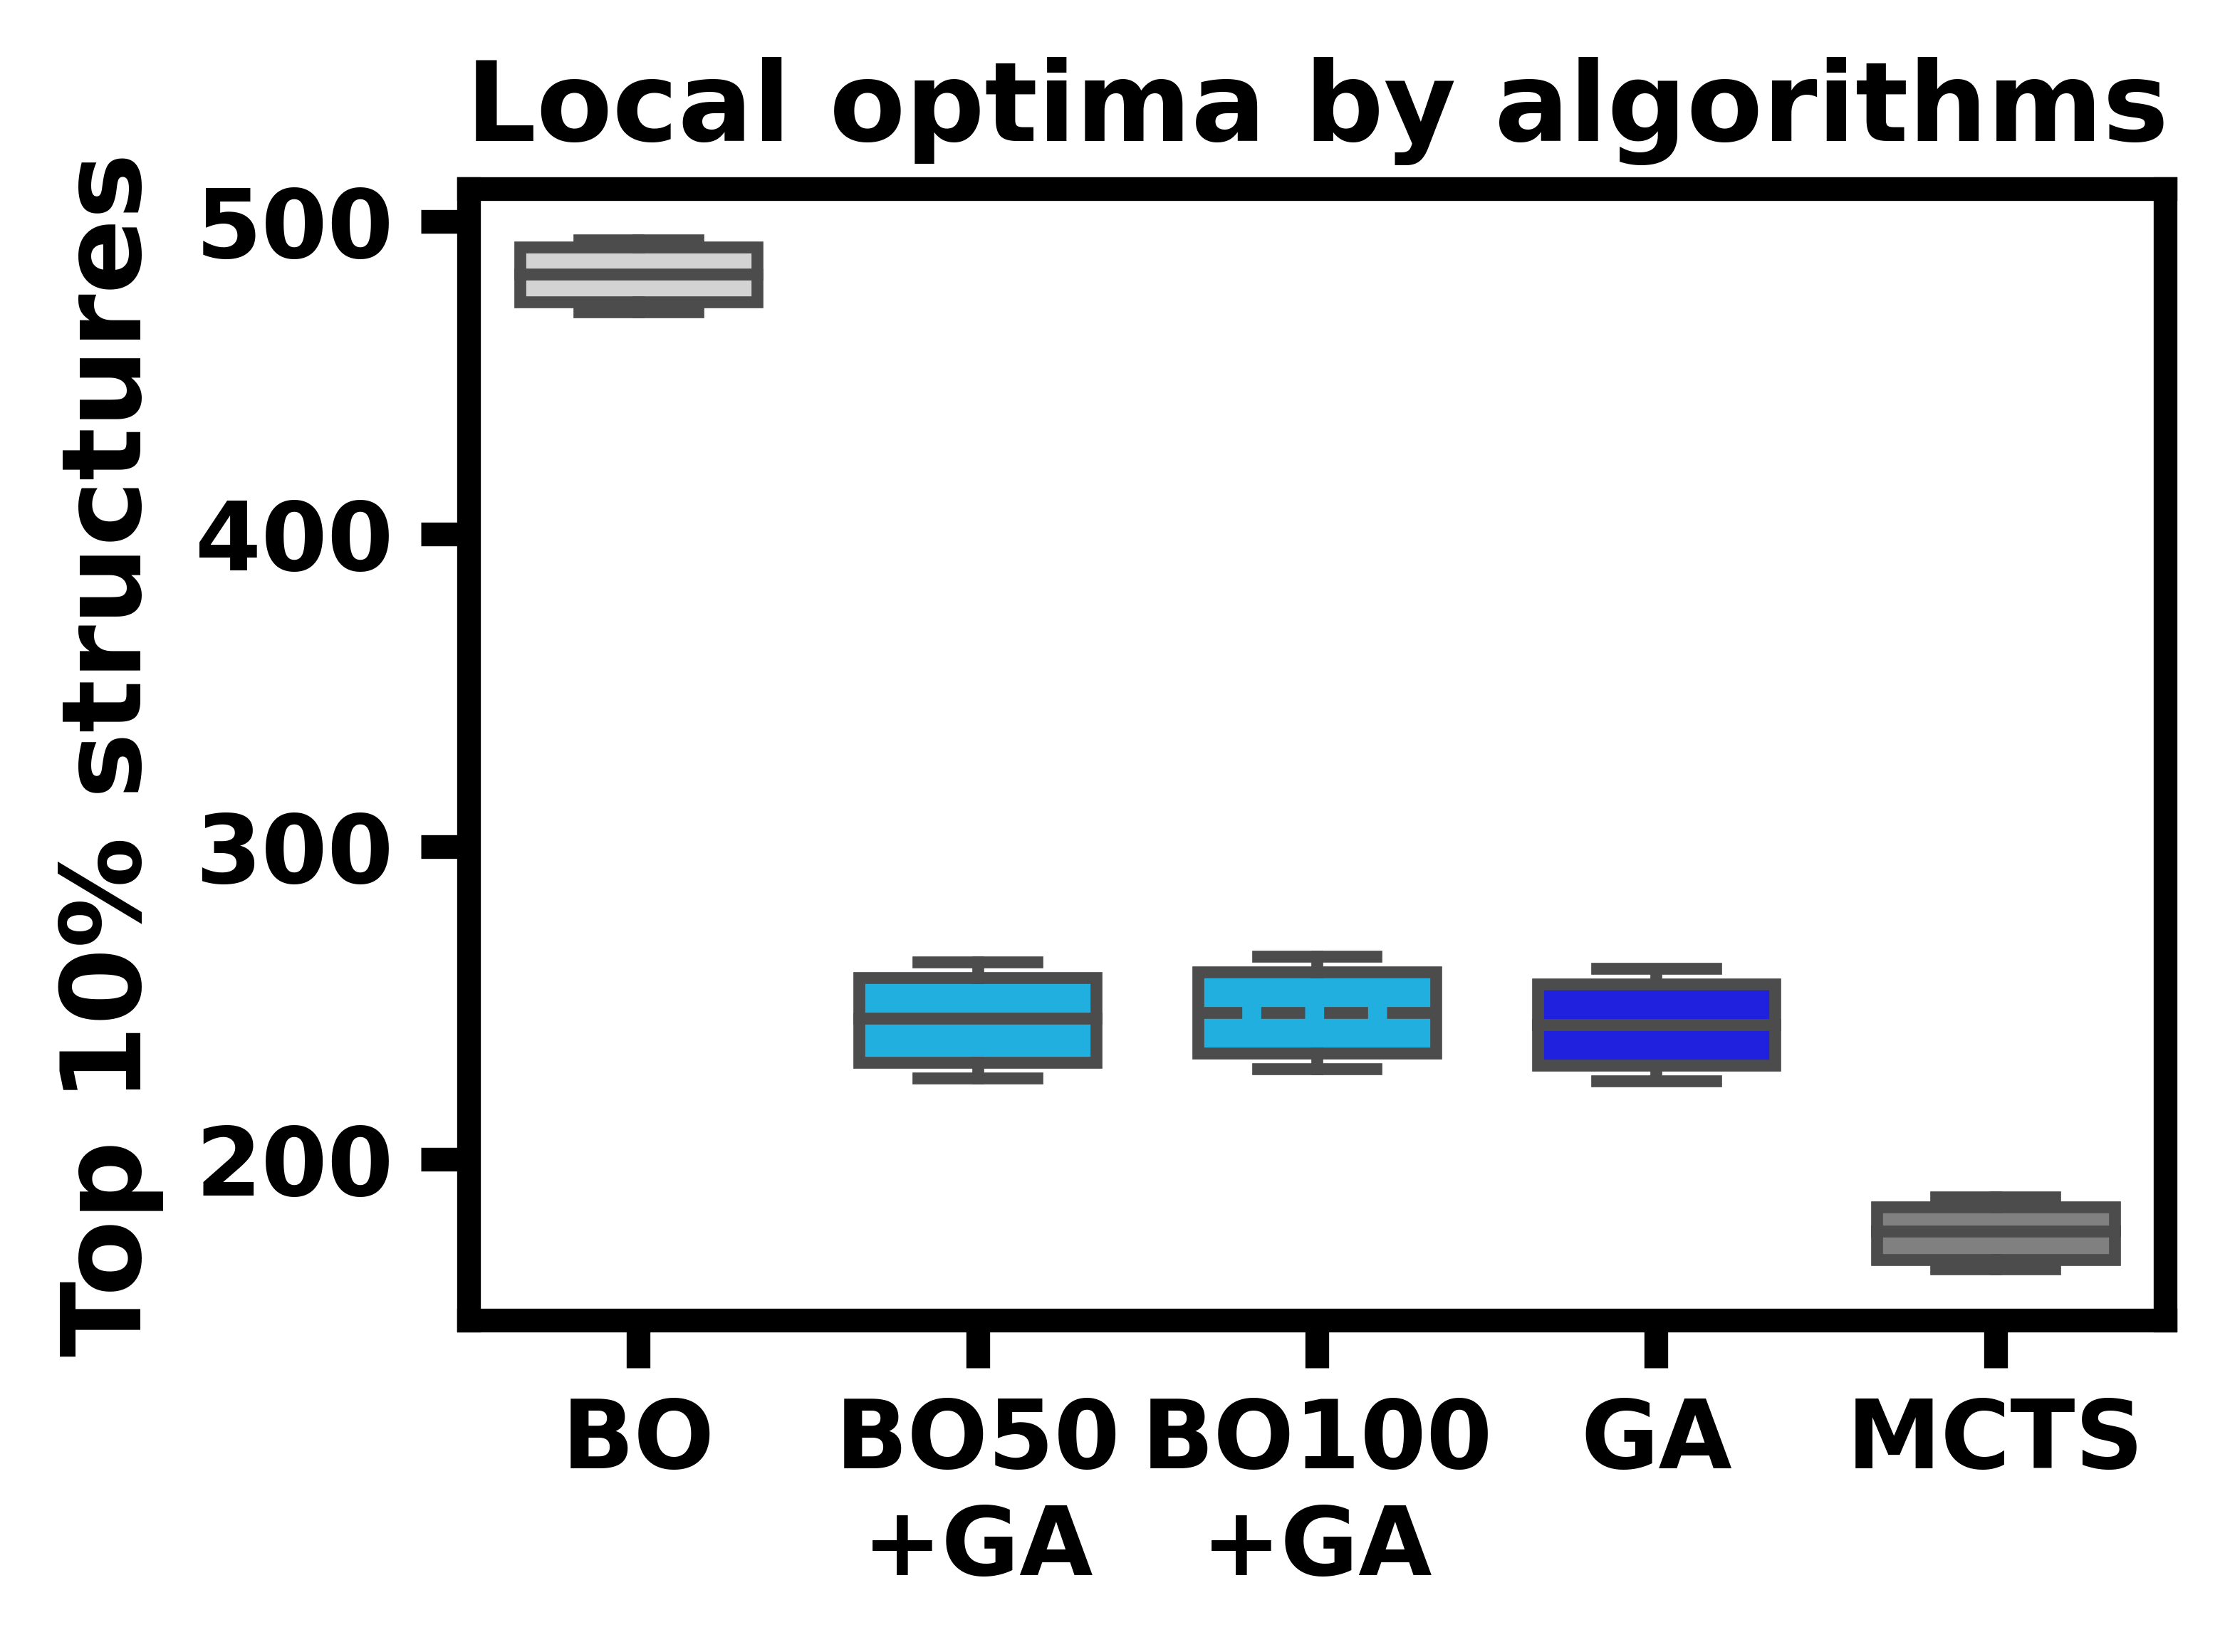

In [2]:
for pindex, P  in enumerate(P_list):
    
    GA_file_path = os.path.join(GA_dir, P)
    GA50_file_path = os.path.join(GA50_dir, P)
    GA100_file_path = os.path.join(GA100_dir, P)
    BO_file_path = os.path.join(BO_dir, P)
    MDTS_file_path = os.path.join(MDTS_dir, P)

    GAdata = np.loadtxt(GA_file_path, dtype=int)
    GA50data = np.loadtxt(GA50_file_path, dtype=int)
    GA100data = np.loadtxt(GA100_file_path, dtype=int)
    BOdata = np.loadtxt(BO_file_path, dtype=int)
    MDTSdata = np.loadtxt(MDTS_file_path, dtype=int)

    data = [BOdata, GA50data, GA100data, GAdata, MDTSdata]
    labels = ['BO', 'BO50\n+GA', 'BO100\n+GA', 'GA', 'MCTS']

    plt.figure(figsize=(4, 3), dpi=800)
    box = sns.boxplot(
        data=data,
        width = 0.7,
        showfliers = False,
        whis = 0.2,
        palette=custom_palette
    )

    for i, artist in enumerate(plt.gca().artists):
        if i == 2:
            for j in range(i*6+2, i*6+5):
                line = plt.gca().lines[j]
                line.set_linestyle('--') 
    
    plt.gca().spines['top'].set_linewidth(3)
    plt.gca().spines['right'].set_linewidth(3)
    plt.gca().spines['bottom'].set_linewidth(3)
    plt.gca().spines['left'].set_linewidth(3)
    plt.tick_params(axis='both', which='major', width=3, length=6)
    plt.xticks(range(len(data)), labels, fontsize=12,fontweight='bold')
    plt.yticks(fontsize=12,fontweight='bold')
    plt.ylabel(title_list[pindex],fontsize=14,fontweight='bold')
    plt.title('Local optima by algorithms',fontsize=14,fontweight='bold')
    plt.tight_layout()
    plt.savefig(P.split('.log')[0]+'.png')
    plt.show()